### refmol
![refmol](./assets/refmol.png)

In [1]:
import sys
from rdkit import Chem
from rdkit.Chem import Draw
from pathlib import Path

sys.path.append("/pubhome/qcxia02/git-repo/TorsionNet/RDK_torsion/rdkit_Pfrag/utils")
from TFG import TorsionFragmentGenerator

>>> TorsionPairs:
[[1, 2], [7, 8], [8, 10], [10, 11], [11, 13], [13, 14], [16, 17]]
>>> TorsionQuartet:
[0, 1, 2, 3]
[5, 7, 8, 10]
[7, 8, 10, 11]
[8, 10, 11, 12]
[12, 11, 13, 14]
[11, 13, 14, 24]
[15, 16, 17, 18]
>>> Total 7 torsion fragments
>>>>>> New quartet atoms for 0:
[0, 1, 2, 3]


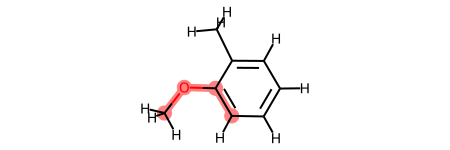

>>>>>> New quartet atoms for 1:
[10, 8, 7, 5]


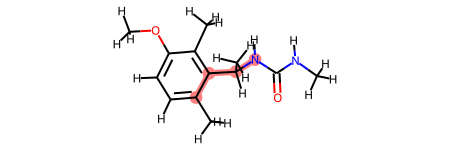

>>>>>> New quartet atoms for 2:
[7, 8, 10, 11]


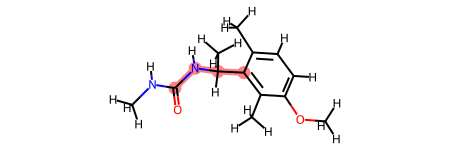

>>>>>> New quartet atoms for 3:
[8, 10, 11, 12]


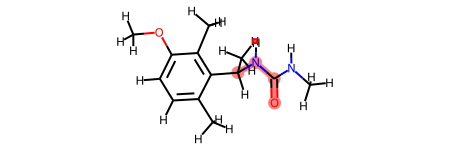

>>>>>> New quartet atoms for 4:
[4, 3, 5, 6]


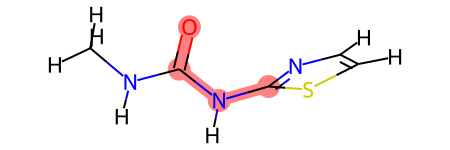

>>>>>> New quartet atoms for 5:
[3, 5, 6, 11]


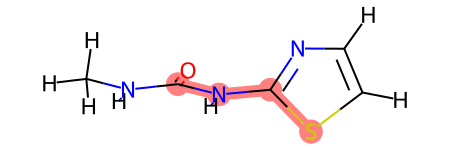

>>>>>> New quartet atoms for 6:
[9, 8, 7, 6]


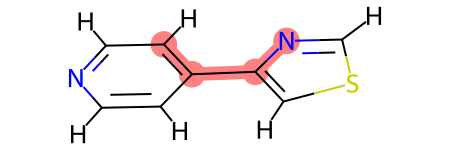

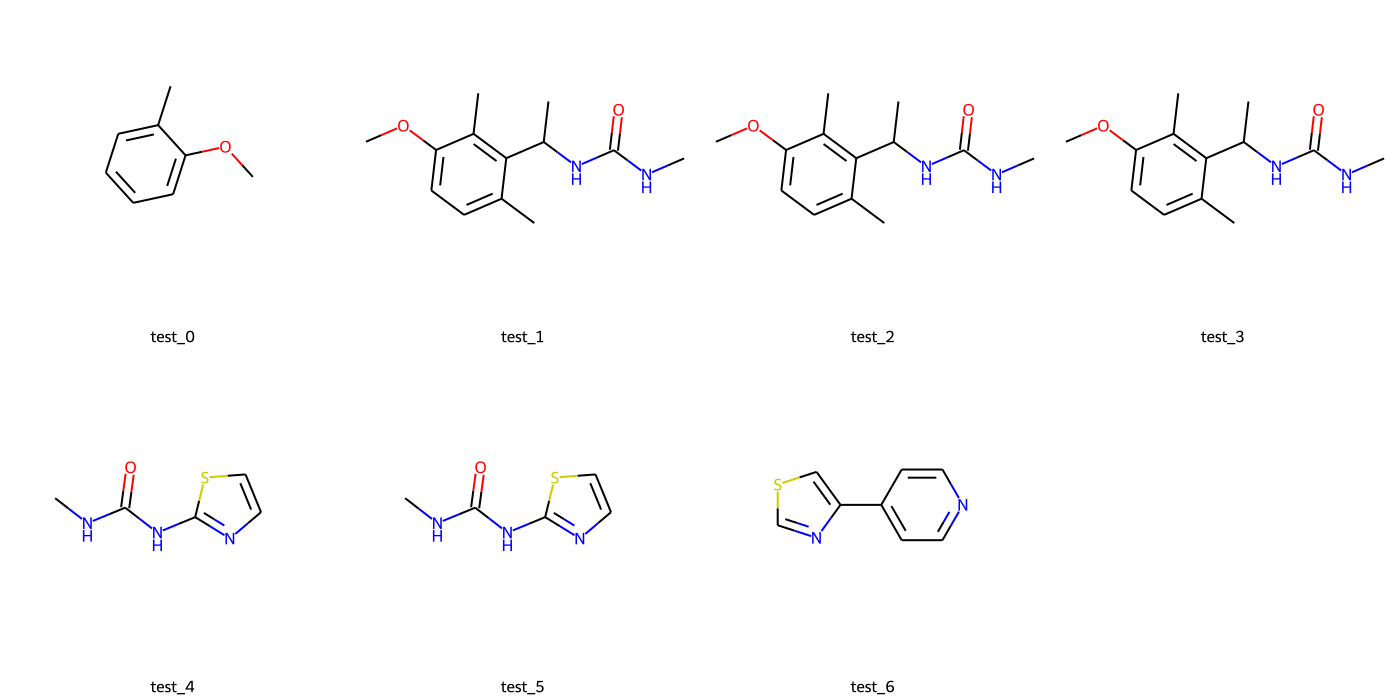

In [2]:
mol = Chem.MolFromSmiles("COc3ccc(C)c(C(C)NC(=O)Nc2nc(c1ccncc1)cs2)c3C") # ref_mol
Chem.SanitizeMol(mol)
mol = Chem.AddHs(mol)


TF = TorsionFragmentGenerator(mol, outpath=Path("outputs"), name="test") # This name is the prefix for output SDF mol

new_mols = TF.mols
new_quartets = TF.new_quartets
out_names = TF.outnames

print(f">>> Total {len(new_mols)} torsion fragments")

for i, new_mol in enumerate(new_mols):
    quartet = new_mol.GetProp("TORSION_ATOMS_FRAGMENT").split(" ")
    quartet = [int(idx) for idx in quartet]
    print(f">>>>>> New quartet atoms for {i}:")
    print(quartet)
    new_mol.__sssAtoms = quartet

    display(new_mol)

img = Draw.MolsToGridImage(
    [ Chem.MolFromSmiles(Chem.MolToSmiles(new_mol)) for new_mol in new_mols],
    molsPerRow=4,
    subImgSize=(350,350),
    legends = out_names
)
display(img)



>>> TorsionPairs:
[[2, 6], [10, 12], [12, 13], [17, 19], [19, 20], [20, 21], [24, 27], [27, 28]]
>>> TorsionQuartet:
[1, 2, 6, 11]
[9, 10, 12, 13]
[10, 12, 13, 14]
[16, 17, 19, 20]
[17, 19, 20, 35]
[35, 20, 21, 22]
[23, 24, 27, 28]
[24, 27, 28, 29]
>>> Total 8 torsion fragments
>>>>>> New quartet atoms for 0:
[1, 2, 6, 11]


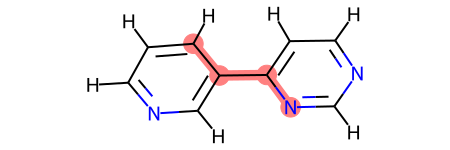

>>>>>> New quartet atoms for 1:
[3, 4, 6, 7]


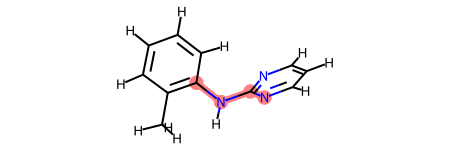

>>>>>> New quartet atoms for 2:
[4, 6, 7, 8]


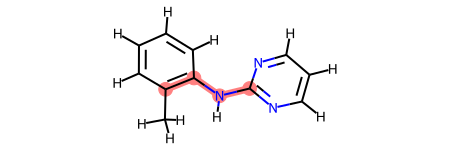

>>>>>> New quartet atoms for 3:
[3, 4, 6, 7]


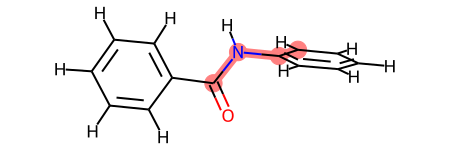

>>>>>> New quartet atoms for 4:
[4, 6, 7, 14]


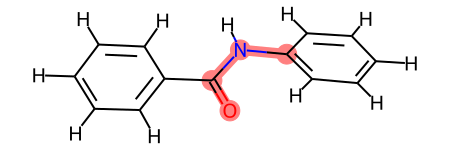

>>>>>> New quartet atoms for 5:
[0, 6, 7, 8]


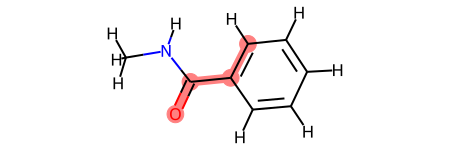

>>>>>> New quartet atoms for 6:
[2, 3, 6, 7]


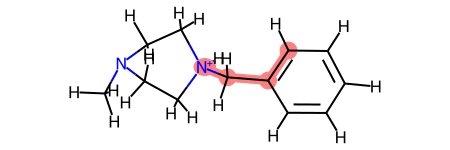

>>>>>> New quartet atoms for 7:
[3, 6, 7, 8]


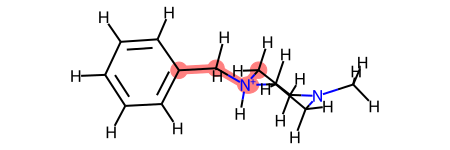

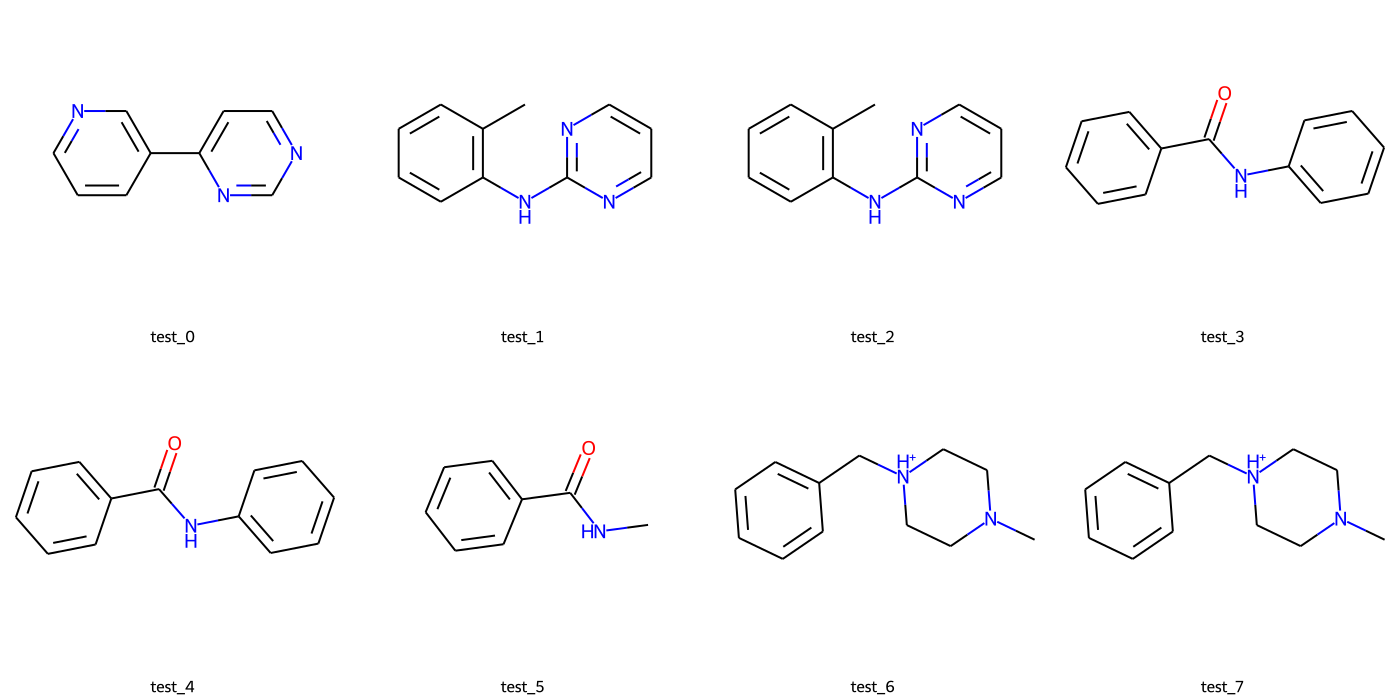

In [4]:
sdffile = "./test_molecules.sdf"
mol = Chem.SDMolSupplier(sdffile, removeHs = False)[0]
Chem.SanitizeMol(mol)
mol = Chem.AddHs(mol)


TF = TorsionFragmentGenerator(mol, outpath=Path("outputs"), name="test") # This name is the prefix for output SDF mol

new_mols = TF.mols
new_quartets = TF.new_quartets
out_names = TF.outnames

print(f">>> Total {len(new_mols)} torsion fragments")

for i, new_mol in enumerate(new_mols):
    quartet = new_mol.GetProp("TORSION_ATOMS_FRAGMENT").split(" ")
    quartet = [int(idx) for idx in quartet]
    print(f">>>>>> New quartet atoms for {i}:")
    print(quartet)
    new_mol.__sssAtoms = quartet

    display(new_mol)

img = Draw.MolsToGridImage(
    [ Chem.MolFromSmiles(Chem.MolToSmiles(new_mol)) for new_mol in new_mols],
    molsPerRow=4,
    subImgSize=(350,350),
    legends = out_names
)
display(img)

